# методы визуализации

## covid_data — данные о показателях заболеваемости за каждый день в различных регионах 187 стран

In [2]:
import pandas as pd
covid_data = pd.read_csv('data/covid_data.csv')
display(covid_data)

,date,province/state,country,confirmed,deaths,recovered
0,01/22/2020,Anhui,China,1.0,0.0,0.0
1,01/22/2020,Beijing,China,14.0,0.0,0.0
2,01/22/2020,Chongqing,China,6.0,0.0,0.0
3,01/22/2020,Fujian,China,1.0,0.0,0.0
4,01/22/2020,Gansu,China,0.0,0.0,0.0
...,...,...,...,...,...,...
306424,05/29/2021,Zaporizhia Oblast,Ukraine,102641.0,2335.0,95289.0
306425,05/29/2021,Zeeland,Netherlands,29147.0,245.0,0.0
306426,05/29/2021,Zhejiang,China,1364.0,1.0,1324.0
306427,05/29/2021,Zhytomyr Oblast,Ukraine,87550.0,1738.0,83790.0


Мы будем работать со следующими столбцами:

date — дата наблюдения;

province/state — наименование провинции/штата;

country — наименование страны;

confirmed — общее число зафиксированных случаев на указанный день;

deaths — общее число зафиксированных смертей на указанный день;

recovered — общее число выздоровлений на указанный день.

country_vaccinations — данные о процессе вакцинирования людей в 221 стране мира. (источник данных)

In [3]:
vaccinations_data = pd.read_csv('data/country_vaccinations.csv')
vaccinations_data = vaccinations_data[
    ['country', 'date', 'total_vaccinations', 
     'people_vaccinated', 'people_vaccinated_per_hundred',
     'people_fully_vaccinated', 'people_fully_vaccinated_per_hundred',
     'daily_vaccinations', 'vaccines']
]
display(vaccinations_data)

,country,date,total_vaccinations,people_vaccinated,people_vaccinated_per_hundred,people_fully_vaccinated,people_fully_vaccinated_per_hundred,daily_vaccinations,vaccines
0,Afghanistan,2021-02-22,0.0,0.0,0.00,NaN,NaN,NaN,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
1,Afghanistan,2021-02-23,NaN,NaN,NaN,NaN,NaN,1367.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
2,Afghanistan,2021-02-24,NaN,NaN,NaN,NaN,NaN,1367.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
3,Afghanistan,2021-02-25,NaN,NaN,NaN,NaN,NaN,1367.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
4,Afghanistan,2021-02-26,NaN,NaN,NaN,NaN,NaN,1367.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
...,...,...,...,...,...,...,...,...,...
42790,Zimbabwe,2021-09-01,4270430.0,2615233.0,17.33,1655197.0,10.97,36416.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac..."
42791,Zimbabwe,2021-09-02,4323735.0,2649505.0,17.56,1674230.0,11.09,39711.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac..."
42792,Zimbabwe,2021-09-03,4372216.0,2681657.0,17.77,1690559.0,11.20,42317.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac..."
42793,Zimbabwe,2021-09-04,4400246.0,2698332.0,17.88,1701914.0,11.28,41413.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac..."


Данная таблица содержит следующие столбцы:

country — наименование страны;

date — дата наблюдения;

total_vaccinations — общее число введённых вакцин в стране на указанный день;

people_vaccinated — общее число привитых первым компонентом в стране на указанный день;

people_vaccinated_per_hundred — процент привитых первым компонентом в стране на указанный день (рассчитывается как );

people_fully_vaccinated — общее число привитых вторым компонентом в стране на указанный день (первый компонент уже был введён им ранее);

people_fully_vaccinated_per_hundred — процент привитых вторым компонентом в стране на указанный 
день (рассчитывается как );

daily_vaccination — ежедневная вакцинация (число вакцинированных в указанный день);

vaccines — комбинации вакцин, используемые в стране.

Группируем таблицу по дате и названию страны и рассчитываем суммарные показатели по всем регионам. Тем самым переходим от данных по регионам к данным по странам

In [4]:
covid_data = covid_data.groupby(
    ['date', 'country'], 
    as_index=False
)[['confirmed', 'deaths', 'recovered']].sum()
display(covid_data)

,date,country,confirmed,deaths,recovered
0,01/01/2021,Afghanistan,51526.0,2191.0,41727.0
1,01/01/2021,Albania,58316.0,1181.0,33634.0
2,01/01/2021,Algeria,99897.0,2762.0,67395.0
3,01/01/2021,Andorra,8117.0,84.0,7463.0
4,01/01/2021,Angola,17568.0,405.0,11146.0
...,...,...,...,...,...
86780,12/31/2020,Vietnam,1465.0,35.0,1325.0
86781,12/31/2020,West Bank and Gaza,138004.0,1400.0,117183.0
86782,12/31/2020,Yemen,2099.0,610.0,1394.0
86783,12/31/2020,Zambia,20725.0,388.0,18660.0


Преобразуем даты в формат datetime с помощью функции pd.to_datetime()

In [5]:
covid_data['date'] = pd.to_datetime(covid_data['date'])
display(covid_data)

,date,country,confirmed,deaths,recovered
0,2021-01-01,Afghanistan,51526.0,2191.0,41727.0
1,2021-01-01,Albania,58316.0,1181.0,33634.0
2,2021-01-01,Algeria,99897.0,2762.0,67395.0
3,2021-01-01,Andorra,8117.0,84.0,7463.0
4,2021-01-01,Angola,17568.0,405.0,11146.0
...,...,...,...,...,...
86780,2020-12-31,Vietnam,1465.0,35.0,1325.0
86781,2020-12-31,West Bank and Gaza,138004.0,1400.0,117183.0
86782,2020-12-31,Yemen,2099.0,610.0,1394.0
86783,2020-12-31,Zambia,20725.0,388.0,18660.0


3
Создадим признак больных на данный момент (active). Для этого вычтем из общего числа зафиксированных случаев число смертей и число выздоровевших пациентов:

In [6]:
covid_data['active'] = covid_data['confirmed'] - covid_data['deaths'] - covid_data['recovered']
display(covid_data)

,date,country,confirmed,deaths,recovered,active
0,2021-01-01,Afghanistan,51526.0,2191.0,41727.0,7608.0
1,2021-01-01,Albania,58316.0,1181.0,33634.0,23501.0
2,2021-01-01,Algeria,99897.0,2762.0,67395.0,29740.0
3,2021-01-01,Andorra,8117.0,84.0,7463.0,570.0
4,2021-01-01,Angola,17568.0,405.0,11146.0,6017.0
...,...,...,...,...,...,...
86780,2020-12-31,Vietnam,1465.0,35.0,1325.0,105.0
86781,2020-12-31,West Bank and Gaza,138004.0,1400.0,117183.0,19421.0
86782,2020-12-31,Yemen,2099.0,610.0,1394.0,95.0
86783,2020-12-31,Zambia,20725.0,388.0,18660.0,1677.0


Создадим признак ежедневного прироста числа заболевших, умерших и выздоровевших людей. Для этого отсортируем данные по названиям стран, а затем по датам. После этого произведём группировку по странам и рассчитаем разницу между «вчера и сегодня» с помощью метода diff():

In [7]:
covid_data = covid_data.sort_values(by=['country', 'date'])
covid_data['daily_confirmed'] = covid_data.groupby('country')['confirmed'].diff()
covid_data['daily_deaths'] = covid_data.groupby('country')['deaths'].diff()
covid_data['daily_recovered'] = covid_data.groupby('country')['recovered'].diff()
covid_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86785 entries, 11337 to 17645
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date             86785 non-null  datetime64[ns]
 1   country          86785 non-null  object        
 2   confirmed        86785 non-null  float64       
 3   deaths           86785 non-null  float64       
 4   recovered        86785 non-null  float64       
 5   active           86785 non-null  float64       
 6   daily_confirmed  86564 non-null  float64       
 7   daily_deaths     86564 non-null  float64       
 8   daily_recovered  86564 non-null  float64       
dtypes: datetime64[ns](1), float64(7), object(1)
memory usage: 6.6+ MB


В таблице vaccinations_data достаточно будет преобразовать столбцы в формат datetime:

In [8]:
vaccinations_data['date'] = pd.to_datetime(vaccinations_data['date'])
display(vaccinations_data)

,country,date,total_vaccinations,people_vaccinated,people_vaccinated_per_hundred,people_fully_vaccinated,people_fully_vaccinated_per_hundred,daily_vaccinations,vaccines
0,Afghanistan,2021-02-22,0.0,0.0,0.00,NaN,NaN,NaN,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
1,Afghanistan,2021-02-23,NaN,NaN,NaN,NaN,NaN,1367.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
2,Afghanistan,2021-02-24,NaN,NaN,NaN,NaN,NaN,1367.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
3,Afghanistan,2021-02-25,NaN,NaN,NaN,NaN,NaN,1367.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
4,Afghanistan,2021-02-26,NaN,NaN,NaN,NaN,NaN,1367.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
...,...,...,...,...,...,...,...,...,...
42790,Zimbabwe,2021-09-01,4270430.0,2615233.0,17.33,1655197.0,10.97,36416.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac..."
42791,Zimbabwe,2021-09-02,4323735.0,2649505.0,17.56,1674230.0,11.09,39711.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac..."
42792,Zimbabwe,2021-09-03,4372216.0,2681657.0,17.77,1690559.0,11.20,42317.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac..."
42793,Zimbabwe,2021-09-04,4400246.0,2698332.0,17.88,1701914.0,11.28,41413.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac..."


За какой период представлены данные в таблице covid_data? В качестве ответа введите даты в формате datetime (без указания времени).

In [9]:
display(covid_data['date'].min())

display(covid_data['date'].max())


Timestamp('2020-01-22 00:00:00')

Timestamp('2021-05-29 00:00:00')

За какой период представлены данные в таблице vaccinations_data? В качестве ответа введите даты в формате datetime без указания времени

In [10]:
display(vaccinations_data['date'].min())
display(vaccinations_data['date'].max())

Timestamp('2020-12-02 00:00:00')

Timestamp('2021-09-06 00:00:00')

In [11]:
covid_df  = covid_data.merge(
    vaccinations_data, 
    on=['date','country'],
    how='left'
)
display(covid_df)

,date,country,confirmed,deaths,recovered,active,daily_confirmed,daily_deaths,daily_recovered,total_vaccinations,people_vaccinated,people_vaccinated_per_hundred,people_fully_vaccinated,people_fully_vaccinated_per_hundred,daily_vaccinations,vaccines
0,2020-02-24,Afghanistan,1.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-02-25,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-02-26,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-02-27,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-02-28,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86780,2020-03-12,occupied Palestinian territory,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
86781,2020-03-14,occupied Palestinian territory,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
86782,2020-03-15,occupied Palestinian territory,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
86783,2020-03-16,occupied Palestinian territory,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


В получившейся в задании 3.3 таблице covid_df создайте признаки death_rate — общий процент смертей среди зафиксированных случаев (летальность) и recover_rate — общий процент случаев выздоровления. Данные характеристики рассчитайте как отношение числа смертей (deaths) и числа выздоровлений (recovered) к числу зафиксированных случаев (confirmed) и умножьте результаты на 100%.

In [12]:
covid_df['death_rate'] = covid_df['deaths'] / covid_df['confirmed'] * 100
covid_df['recover_rate'] = covid_df['recovered'] / covid_df['confirmed'] * 100
display(covid_df[covid_df['country']=='Russia'])

,date,country,confirmed,deaths,recovered,active,daily_confirmed,daily_deaths,daily_recovered,total_vaccinations,people_vaccinated,people_vaccinated_per_hundred,people_fully_vaccinated,people_fully_vaccinated_per_hundred,daily_vaccinations,vaccines,death_rate,recover_rate
64183,2020-01-31,Russia,2.0,0.0,0.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000
64184,2020-02-01,Russia,2.0,0.0,0.0,2.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000
64185,2020-02-02,Russia,2.0,0.0,0.0,2.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000
64186,2020-02-03,Russia,2.0,0.0,0.0,2.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000
64187,2020-02-04,Russia,2.0,0.0,0.0,2.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64663,2021-05-25,Russia,4960174.0,117197.0,4579421.0,263556.0,7762.0,385.0,8579.0,27026797.0,15768938.0,10.81,11257859.0,7.72,358224.0,"EpiVacCorona, Sputnik V",2.362760,92.323798
64664,2021-05-26,Russia,4968421.0,117595.0,4588421.0,262405.0,8247.0,398.0,9000.0,27611859.0,16159658.0,11.07,11452201.0,7.85,392708.0,"EpiVacCorona, Sputnik V",2.366849,92.351695
64665,2021-05-27,Russia,4977332.0,117990.0,4598014.0,261328.0,8911.0,395.0,9593.0,27739956.0,16225813.0,11.12,11514143.0,7.89,367571.0,"EpiVacCorona, Sputnik V",2.370547,92.379090
64666,2021-05-28,Russia,4986458.0,118386.0,4607276.0,260796.0,9126.0,396.0,9262.0,28112894.0,16331436.0,11.19,11781458.0,8.07,377834.0,"EpiVacCorona, Sputnik V",2.374150,92.395765


Какова максимальная летальность в США (United States) за весь период? Ответ округлите до второго знака после запятой.

In [13]:
mask = covid_df['country'] == 'United States'
covid_df[mask]['death_rate'].max().round(2)

7.19

Чему равен средний процент выздоровевших в России (Russia)? Ответ округлите до второго знака после запятой.

In [14]:
mask1 = covid_df['country'] == 'Russia'
covid_df[mask1]['recover_rate'].mean().round(2)

67.06

## cохраняем фаил covid_df

In [15]:
covid_df.to_csv('data/covid_df.csv', index=False, sep=';')

## БАЗОВАЯ ВИЗУАЛИЗАЦИЯ В PANDAS  plot().
x — название признака, который будет отложен по оси абсцисс;

y — название признака, который будет отложен по оси ординат;

figsize — размер графика (кортеж из ширины и высоты в дюймах);

kind —тип визуализации. Основные типы:

'line' — линейный график (по умолчанию);

'bar' — столбчатая диаграмма;

'barh' — горизонтальная столбчатая диаграмма;

'hist' — гистограмма;

'box' — коробчатая диаграмма (boxplot);

'pie' — круговая диаграмма;

'scatter' — диаграмма рассеяния.

grid — отображение сетки (по умолчанию False);

legend — отображение легенды (по умолчанию False);

title — название графика;

color — цвет.

Теперь мы наконец можем построить график с помощью метода plot(). Будем использовать линейный график размером 12x4 (попробуйте взять другие числа, чтобы увидеть разницу). Подпишем график и отобразим сетку. Параметр lw (line width) отвечает за ширину линии для линейного графика.

<Axes: title={'center': 'Ежедневная заболеваемость во времени'}, xlabel='date'>

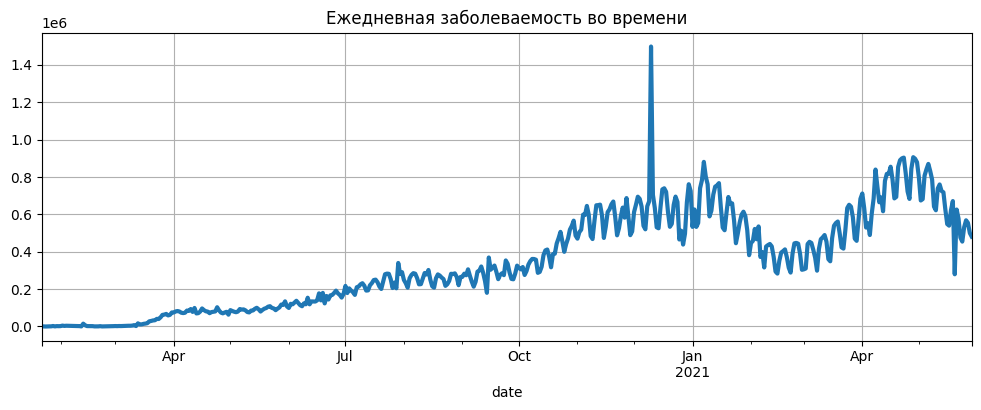

In [16]:
grouped_cases = covid_df.groupby('date')['daily_confirmed'].sum()
grouped_cases.plot(
    kind='line',
    figsize=(12, 4),
    title='Ежедневная заболеваемость во времени',
    grid = True,
    lw=3
)